                                                 ВНП ЛАБ 1

Прва дополнителна лабораториска по ВНП

Користејќи Selenium соберете ги податоците за сите книги што се достапни на страницата https://books.toscrape.com/ по категории. Потоа, визуелизирајте ја распределбата на книги по категории.

Насоки: Прво извлечете ги сите категории достапни на страницата заедно со линковите што водат до соодветната страна за секоја категорија. Потоа, искористете ги линковите за да се навигирате до страницата за секоја категорија. На крај, справете со страничењето на секоја страница за да ги соберете сите книги. Потоа, визуелизирајте ја распределбата.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [4]:
pip install selenium

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.7 MB 4.8 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.7 MB 6.1 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.7 MB 4.7 MB/s eta 0:00:02
   -------------- ------------------------- 3.4/9.7 MB 4.5 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.7 MB 4.1 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.7 MB 4.0 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.7 MB 4.0 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.7 MB 4.0 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.7 MB 4.0 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.7 MB 3.9 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.7 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 4.0 MB/s eta 0:00:00

  Attempting unins

In [15]:
import time

from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By

In [16]:
driver = Chrome()

In [17]:
driver.get("https://books.toscrape.com/")

In [18]:
cat_element = driver.find_elements(By.CSS_SELECTOR, ".side_categories ul li ul li a")
categories = []
for ele in cat_element:
    name = ele.text.strip()
    href = ele.get_attribute("href")
    categories.append((name, href))

In [19]:
df = pd.DataFrame(categories, columns=["Category", "URL"])

In [20]:
df

,Category,URL
0,Travel,https://books.toscrape.com/catalogue/category/...
1,Mystery,https://books.toscrape.com/catalogue/category/...
2,Historical Fiction,https://books.toscrape.com/catalogue/category/...
3,Sequential Art,https://books.toscrape.com/catalogue/category/...
4,Classics,https://books.toscrape.com/catalogue/category/...
5,Philosophy,https://books.toscrape.com/catalogue/category/...
6,Romance,https://books.toscrape.com/catalogue/category/...
7,Womens Fiction,https://books.toscrape.com/catalogue/category/...
8,Fiction,https://books.toscrape.com/catalogue/category/...
9,Childrens,https://books.toscrape.com/catalogue/category/...


In [37]:
counts = []
for name, url in categories:
    driver.get(url)
    total = 0
    while True:
        books = driver.find_elements(By.CSS_SELECTOR, "article.product_pod")
        total += len(books)
        
        next_link = driver.find_elements(By.CSS_SELECTOR, "li.next a")
        if next_link:
           next_href = next_link[0].get_attribute("href")
           driver.get(next_href)
           time.sleep(1)
        else:
           break

    counts.append((name, total))

In [38]:
df1 = pd.DataFrame(counts, columns=["Categories", "Total"])

In [39]:
df1

,Categories,Total
0,Travel,11
1,Mystery,32
2,Historical Fiction,26
3,Sequential Art,75
4,Classics,19
5,Philosophy,11
6,Romance,35
7,Womens Fiction,17
8,Fiction,65
9,Childrens,29


In [48]:
df1_sorted = df1.sort_values("Total", ascending=False)

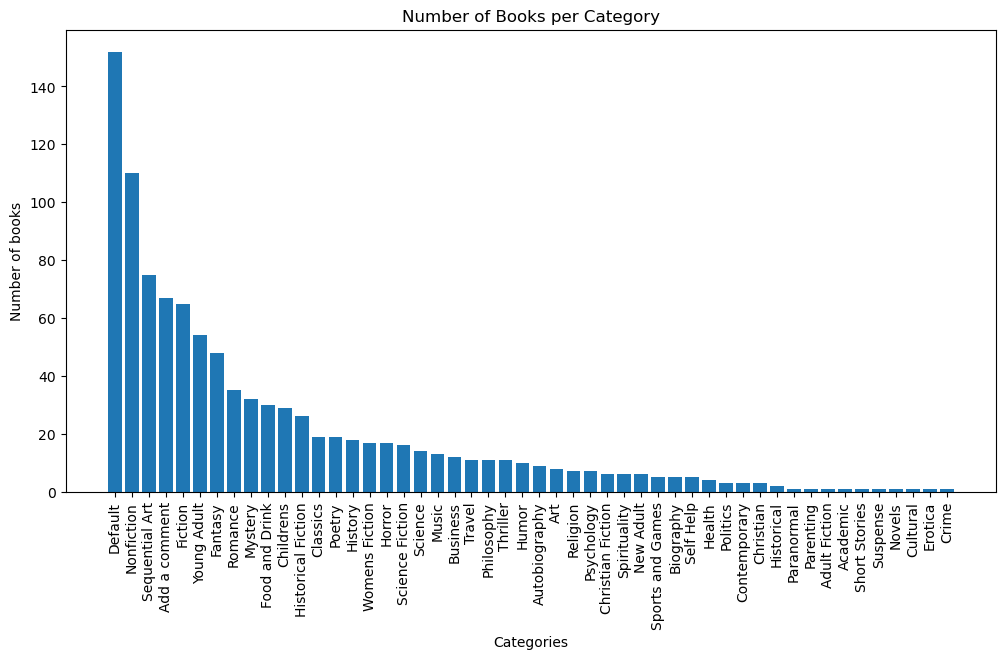

In [50]:
plt.figure(figsize=(12,6))
plt.bar(df1_sorted["Categories"], df1_sorted["Total"])
plt.xticks(rotation=90)
plt.xlabel("Categories")
plt.ylabel("Number of books")
plt.title("Number of Books per Category")
plt.show()

In [52]:
driver.quit()

ВТОРО ДОПОЛНИТЕЛНО БАРАЊЕ

Користејќи Selenium соберете ги податоците за сите книги што се достапни на страницата https://books.toscrape.com/. Односно, за секоја книга навигирајте се до страницата на којашто се прикажани сите детали за книгата и извлечете ги сите достапни податоци. Исто така, соодветно справете се со страничењето со цел да ги извлечете податоците за сите 1000 книги. На крај, пресметајте дескриптивни статистики за достапноста на книгите.


In [69]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

In [70]:
driver = webdriver.Chrome()

In [71]:
driver.get("https://books.toscrape.com/")

In [72]:
books_data = []
while True:
    books = driver.find_elements(By.CSS_SELECTOR, "article.product_pod h3 a")
    book_links = [book.get_attribute("href") for book in books]

    for book_link in book_links:
        driver.get(book_link)
        time.sleep(0.5)
        
        # --- Извлекување податоци ---
        title = driver.find_element(By.CSS_SELECTOR, ".product_main h1").text
        price = driver.find_element(By.CSS_SELECTOR, ".price_color").text
        availability = driver.find_element(By.CSS_SELECTOR, ".availability").text.strip()
        rating = driver.find_element(By.CSS_SELECTOR, ".star-rating").get_attribute("class").split()[-1]

        table_rows = driver.find_elements(By.CSS_SELECTOR, "table.table-striped tr")
        book_info = {}
        for row in table_rows:
            key = row.find_element(By.TAG_NAME, "th").text
            value = row.find_element(By.TAG_NAME, "td").text
            book_info[key] = value

        books_data.append((title, price, availability, rating, book_info))

        # Назад кон страницата со листа на книги
        driver.back()
        time.sleep(0.5)

    next_page = driver.find_elements(By.CSS_SELECTOR, "li.next a")
    if next_page:
        next_books = next_page[0].get_attribute("href")
        driver.get(next_books)
        time.sleep(1)
    else:
        break


In [73]:
df_books = pd.DataFrame(books_data)

In [74]:
df_books

,0,1,2,3,4
0,A Light in the Attic,£51.77,In stock (22 available),Three,"{'UPC': 'a897fe39b1053632', 'Product Type': 'B..."
1,Tipping the Velvet,£53.74,In stock (20 available),One,"{'UPC': '90fa61229261140a', 'Product Type': 'B..."
2,Soumission,£50.10,In stock (20 available),One,"{'UPC': '6957f44c3847a760', 'Product Type': 'B..."
3,Sharp Objects,£47.82,In stock (20 available),Four,"{'UPC': 'e00eb4fd7b871a48', 'Product Type': 'B..."
4,Sapiens: A Brief History of Humankind,£54.23,In stock (20 available),Five,"{'UPC': '4165285e1663650f', 'Product Type': 'B..."
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,£55.53,In stock (1 available),One,"{'UPC': 'cd2a2a70dd5d176d', 'Product Type': 'B..."
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",£57.06,In stock (1 available),Four,"{'UPC': 'bfd5e1701c862ac3', 'Product Type': 'B..."
997,A Spy's Devotion (The Regency Spies of London #1),£16.97,In stock (1 available),Five,"{'UPC': '19fec36a1dfb4c16', 'Product Type': 'B..."
998,1st to Die (Women's Murder Club #1),£53.98,In stock (1 available),One,"{'UPC': 'f684a82adc49f011', 'Product Type': 'B..."


In [76]:
df_books.columns = ["Title", "Price", "Availability", "Rating", "Details"]
df_books.head()

,Title,Price,Availability,Rating,Details
0,A Light in the Attic,£51.77,In stock (22 available),Three,"{'UPC': 'a897fe39b1053632', 'Product Type': 'B..."
1,Tipping the Velvet,£53.74,In stock (20 available),One,"{'UPC': '90fa61229261140a', 'Product Type': 'B..."
2,Soumission,£50.10,In stock (20 available),One,"{'UPC': '6957f44c3847a760', 'Product Type': 'B..."
3,Sharp Objects,£47.82,In stock (20 available),Four,"{'UPC': 'e00eb4fd7b871a48', 'Product Type': 'B..."
4,Sapiens: A Brief History of Humankind,£54.23,In stock (20 available),Five,"{'UPC': '4165285e1663650f', 'Product Type': 'B..."


In [77]:
import re

# Претвори текстот во број
df_books["Available_qty"] = df_books["Availability"].apply(
    lambda x: int(re.search(r'\d+', x).group())  # зема ја првата бројка во текстот
)
df_books[["Title", "Availability", "Available_qty"]].head()

,Title,Availability,Available_qty
0,A Light in the Attic,In stock (22 available),22
1,Tipping the Velvet,In stock (20 available),20
2,Soumission,In stock (20 available),20
3,Sharp Objects,In stock (20 available),20
4,Sapiens: A Brief History of Humankind,In stock (20 available),20


In [78]:
df_books["Available_qty"].describe()

count    1000.000000
mean        8.585000
std         5.654622
min         1.000000
25%         3.000000
50%         7.000000
75%        14.000000
max        22.000000
Name: Available_qty, dtype: float64

In [79]:
driver.quit()

ТРЕТО ДОПОЛНИТЕЛНО БАРАЊЕ

Користејќи Selenium соберете ги податоците за сите филмови достапни на страницата https://www.scrapethissite.com/pages/ajax-javascript/ по години. Потоа, визуелизирајте ја распределбата на филмови по години.

In [119]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

In [120]:
driver = webdriver.Chrome()

In [121]:
driver.get("https://www.scrapethissite.com/pages/ajax-javascript/")

In [122]:
years = ["2015", "2014", "2013", "2012", "2011", "2010"]
data_film = []

for y in years:
    driver.find_element(By.LINK_TEXT, y).click()
    time.sleep(2)

    titles = driver.find_elements(By.CSS_SELECTOR, "tr.film")
    for t in titles:
        title_text = t.text.strip()
        if title_text:
            data_film.append((int(y), title_text))
    #for row in rows:
        #title = row.find_element(By.CLASS_NAME, "film-title").text.strip()
        #data_film.append((int(y), title))
driver.quit()

In [125]:
df_film = pd.DataFrame(data_film, columns=["Year", "Title"])

In [126]:
df_film

,Year,Title
0,2015,Spotlight 6 2
1,2015,Mad Max: Fury Road 10 6
2,2015,The Revenant 12 3
3,2015,Bridge of Spies 6 1
4,2015,The Big Short 5 1
...,...,...
82,2010,The Lost Thing 1 1
83,2010,God of Love 1 1
84,2010,The Wolfman 1 1
85,2010,Strangers No More 1 1


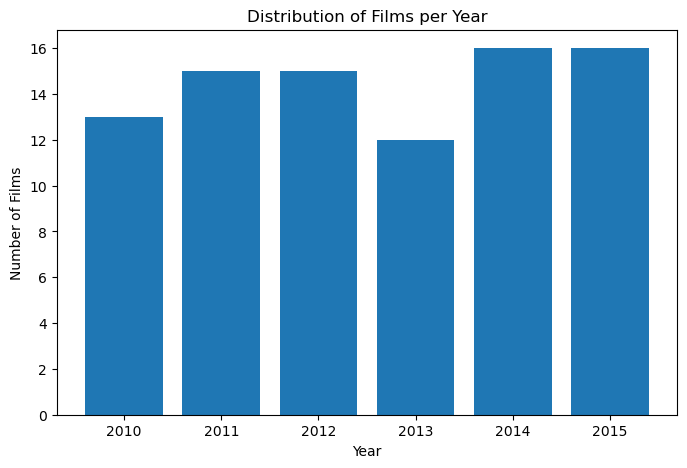

In [128]:
counts = df_film["Year"].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.bar(counts.index, counts.values)
plt.xlabel("Year")
plt.ylabel("Number of Films")
plt.title("Distribution of Films per Year")
plt.show()

ЧЕТВРТО ДОПОЛНИТЕЛНО БАРАЊЕ

Користејќи Selenium соберете ги сите цитати достапни на https://quotes.toscrape.com/scroll заедно со таговите и авторот. Внимавајте соодветно да се справите со scrolling низ страницата. На крај, визуелизирајте ја распределбата на цитати по 10-те најпопуларни тагови.

In [129]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

In [130]:
driver = webdriver.Chrome()

In [132]:
driver.get("https://quotes.toscrape.com/scroll")
time.sleep(1)

In [133]:
quotes = []
last_height = 0

while True:
    # Собери ги сите цитати што се вчитани моментално
    elements = driver.find_elements(By.CLASS_NAME, "quote")
    for e in elements:
        text = e.find_element(By.CLASS_NAME, "text").text
        author = e.find_element(By.CLASS_NAME, "author").text
        tags = [t.text for t in e.find_elements(By.CLASS_NAME, "tag")]
        quotes.append((text, author, tags))
    
    # Скрол до дното за да вчита нови
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(1)

    # Ако нема нова висина → крај
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

driver.quit()

In [135]:
df_quotes = pd.DataFrame(quotes, columns=["Quotes", "Author", "Tags"])
df_quotes

,Quotes,Author,Tags
0,“The world as we have created it is a process ...,Albert Einstein,"[change, deep-thoughts, thinking, world]"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"[abilities, choices]"
2,“There are only two ways to live your life. On...,Albert Einstein,"[inspirational, life, live, miracle, miracles]"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"[aliteracy, books, classic, humor]"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"[be-yourself, inspirational]"
...,...,...,...
545,“You never really understand a person until yo...,Harper Lee,[better-life-empathy]
546,“You have to write the book that wants to be w...,Madeleine L'Engle,"[books, children, difficult, grown-ups, write,..."
547,“Never tell the truth to people who are not wo...,Mark Twain,[truth]
548,"“A person's a person, no matter how small.”",Dr. Seuss,[inspirational]


In [137]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

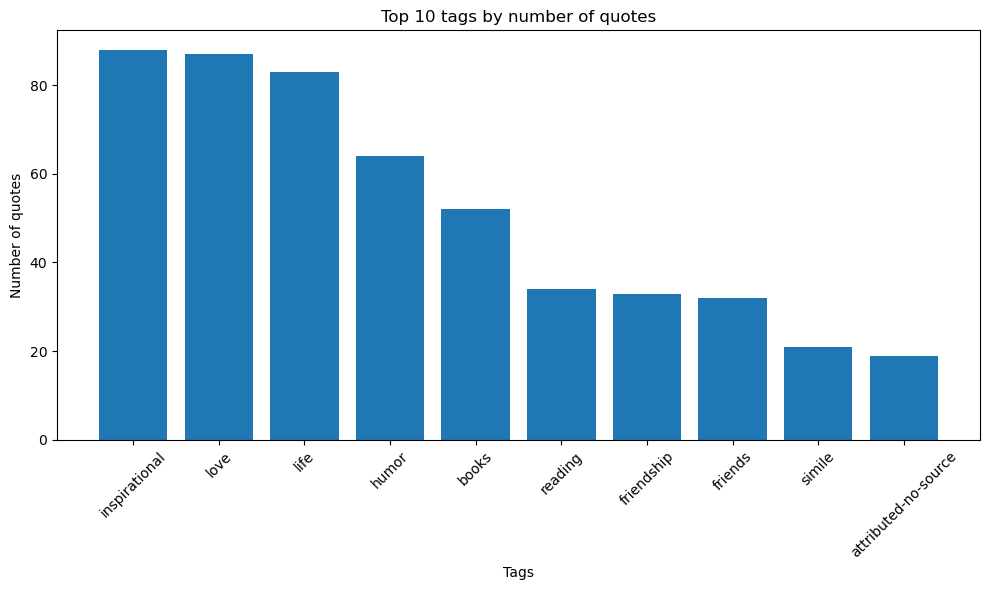

In [139]:
# Flatten: земи ги сите тагови од сите цитати
all_tags = [tag for tags_list in df_quotes["Tags"] for tag in tags_list]

# Број на појавувања по таг
top_tags = Counter(all_tags).most_common(10)

# Претвори во DataFrame за визуелизација
tags_df = pd.DataFrame(top_tags, columns=["tag", "count"])

# График
plt.figure(figsize=(10,6))
plt.bar(tags_df["tag"], tags_df["count"])
plt.xticks(rotation=45)
plt.xlabel("Tags")
plt.ylabel("Number of quotes")
plt.title("Top 10 tags by number of quotes")
plt.tight_layout()
plt.show()